<a href="https://colab.research.google.com/github/VU-CSP/github-classroom-intro-handalls/blob/main/Copy_of_Digital_Image_Analysis_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing & Analysis Assignment #2

## Summary of tasks (repeated within each section)
### You will need to perform the following Tasks:  

-----  

#### Using `image_cell.tif`
**Task 1.**  
    
   From the downloaded image (`img`; file = `image_cell.tif`), make an image `img1` from just the red channel (channel 0) at time point 23 of the tensor [T,Y,X,C]  

**Task 2.**  

   Using `img1`, create a new image `img2` where values less than than the mean are set to the background value (calculated as the minimum intensity value in the image).  

**Task 3.**  

   - Set `img2[0:20,0:20] = np.amax(img2)` (Make a white box in the image to more easily visualize the transformation)  
   - Compress `img2` in half, rotate it 30 degrees clockwise, and translate its `(0,0)` to `(dx,dy)=(200,100)`  
   - Save resulting image as `img3`  
   - Plot `img3` side-by-side with `img2`  

**Task 4.**  **EXTRA CREDIT**  

   - Build a slider function to display different frames of an RGB image over time.  
   - Consider 3 subplots for: 'RED', 'GREEN', 'BLUE' channels
   - Make the interactive slider for time: int with range 0 to the number of frames in video.

-----  
#### Using `FISH_example.tif`
**Task 5.**  

   - Make a slice of `img_FISH` and save as `img_FISH_slice` using: `Z=10`, `Y=120:350`, `X=50:250`  
   - Apply a Gaussian filter to `img_FISH_slice` with `sigma=1` and save it as `img_gaussian_filter_simga_1`
   - Make difference of Gaussians filter of `img_FISH_slice` using `low_sigma=1` and `high_sigma=5` and `img_diff_gaussians`
   - Plot all 3 images side-by-side (in 3 subplots).  
    
-----

## Loading libraries

In [ ]:
# Load libraries
import matplotlib.pyplot as plt # Library used for plotting
from matplotlib.patches import Rectangle # module to plot a rectangle in the image
import numpy as np # library for array manipulation
import seaborn as sn # plotting library
import pandas as pd # data frames library
import tifffile # library to store numpy arrays in TIFF
import skimage # Library for image manipulation
from skimage.io import imread # sublibrary from skimage
from scipy.ndimage import gaussian_filter
from skimage.filters import difference_of_gaussians
from skimage import transform
import os

In [ ]:
import ipywidgets as widgets # Importing library
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.

In [ ]:

import importlib

def module_exists(module_name):
    try:
        importlib.import_module(module_name)
        return True
    except ImportError:
        return False


## Download image files
Do NOT push the image files to your GitHub repository! This notebook with the rendered images is okay.  

The `.gitgnore` file in this repository should ignore the image files if you use git to push your changes to your repository back to GitHub.

In [ ]:
if not module_exists('wget'):
    !pip install wget
if not module_exists('ffmpeg'):
    !pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=de29380a2ccf19b06f29eb6bdaea947ba745b4b05a3560b2ccdcac4c4926354e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=04f07ec107c552ac982021d9da68f3deb1c83c5d538b32f60bfba9fd9bf144e9
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
import wget
if not os.path.exists("./FISH_example.tif"):
    wget.download("https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1", "FISH_example.tif")

if not os.path.exists("./image_cell.tif"):
    wget.download("https://www.dropbox.com/scl/fi/3y4yzq0qywia4i8oftdir/image_cell.tif?rlkey=c8r31vv7o15kmx1axtvmt53bk&dl=1",
                  "image_cell.tif")

In [ ]:
# reading the image and saving as variable img
img = imread('./image_cell.tif')
img.shape

(35, 512, 512, 3)

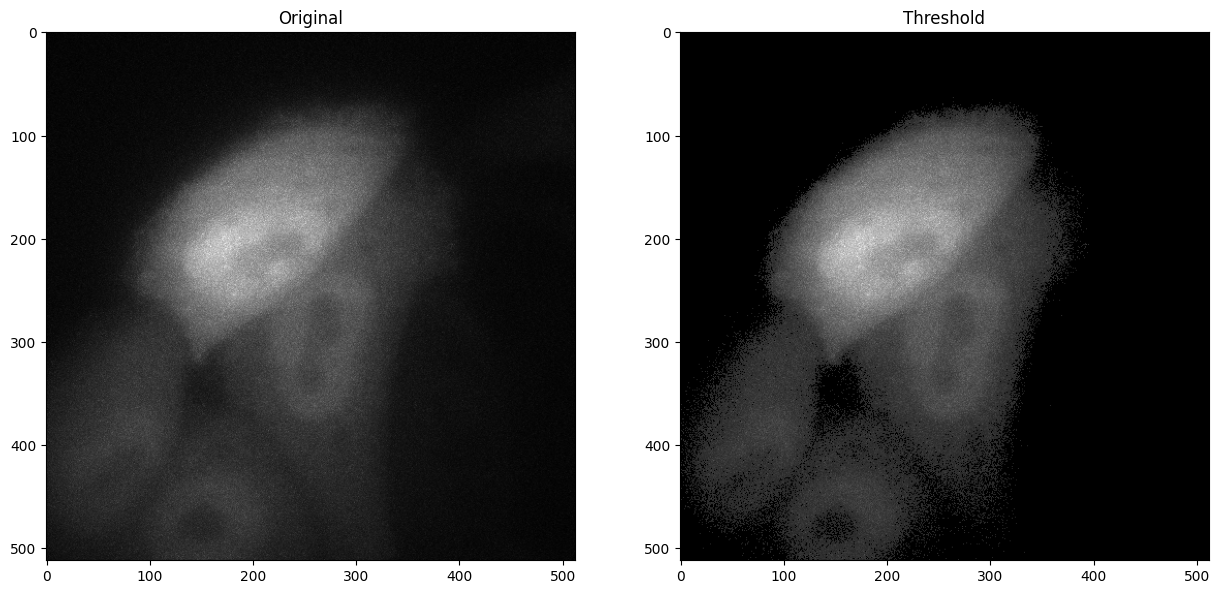

In [ ]:
# Task 1
## make an image `img1` from just the red channel (channel 0) at time point 23 of the tensor [T,Y,X,C]

# add your code here
img1 = img[23, :, :, 0] # change as appropriate

# Task 2
## Using `img1`, create a new image `img2` where values less than than the mean are set to the
## background value (calculated as the minimum intensity value in the image).
mean_intensity = np.mean(img1)
background_value = np.min(img1)
img2 = np.where(img1 < mean_intensity, background_value, img1)

# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].imshow(img1,cmap='gray')
ax[0].set(title='Original')

ax[1].imshow(img2,cmap='gray')
ax[1].set_title('Threshold')
plt.show()

### Task 3.  

   - Set `img2[0:20,0:20] = np.amax(img2)` (Make a white box in the image to more easily visualize the transformation)  
   - Compress `img2` in half, rotate it 30 degrees clockwise, and translate its `(0,0)` to `(dx,dy)=(200,100)`  
   - Save resulting image as `img3`  
   - Plot `img3` side-by-side with `img2`  



Transformation matrix : 
 [[  0.4330127  -0.25      200.       ]
 [  0.25        0.4330127 100.       ]
 [  0.          0.          1.       ]] 



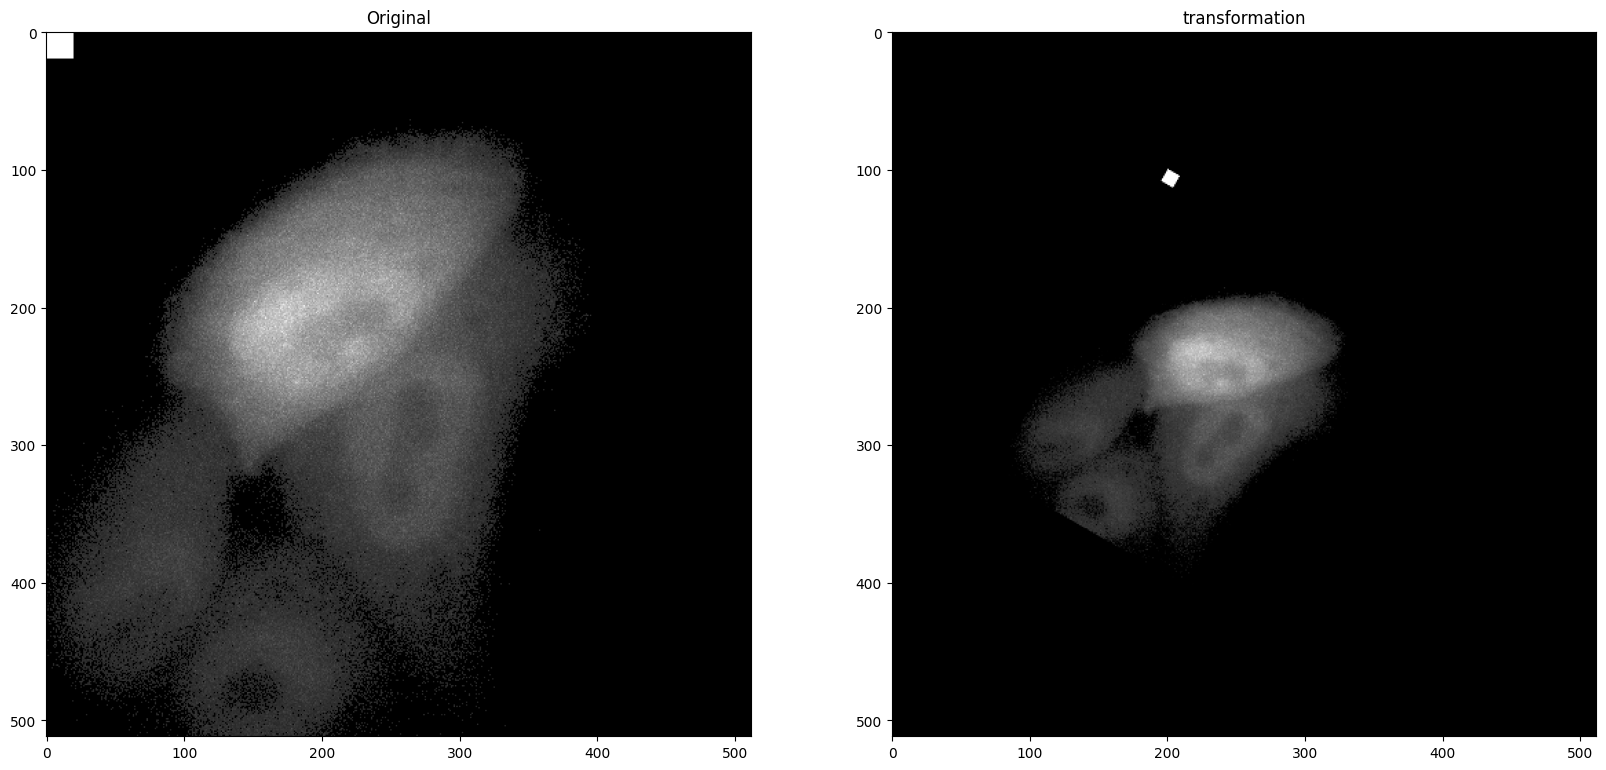

In [ ]:
# Make a white box
img2[0:20, 0:20] = np.amax(img2)

#  transformation matrix

angle = (30*np.pi/180)  #degrees to radians

# Create a similarity transformation matrix
tform = transform.SimilarityTransform(scale=0.5, rotation=angle, translation=(200, 100))
print('Transformation matrix : \n', tform.params , '\n')


# Apply the transformation
img3 = transform.warp(img2, tform.inverse)

# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img2,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img3,cmap='gray')
ax[1].set_title('transformation')
plt.show()

### Task 4. (extra credit)  

- Uncomment the code below and edit it appropriately to:
   - Build a slider function to display different frames of an RGB image over time.  
   - Consider 3 subplots for: 'RED', 'GREEN', 'BLUE' channels
   - Make the interactive slider for time: int with range 0 to the number of frames in video.



In [ ]:
def video_viewer(time):
    # '''
    # This function is intended to display different frames of an RGB image over time by sliding through time  [T,Y,X,C].
    # 3 subplots for: 'RED', 'GREEN', 'BLUE' channels
    # time: int with range 0 to the number of frames in video.
    # '''
    # modify as appropriate
    fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
    #Define subplots based on channels
    Red = img[time,:,:,0] # set in img: timepoint=time, entire X and Y pixels, color channel: red
    axes[0].imshow(Red,cmap='Reds_r')
    Green = img[time,:,:,1] # set in img: timepoint=time, entire X and Y pixels, color channel: green
    axes[1].imshow(Green,cmap='Greens_r')
    Blue = img[time,:,:,2] # set in img: timepoint=time, entire X and Y pixels, color channel: blue
    axes[2].imshow(Blue,cmap='Blues_r')
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.show()

# # The code below will test your video_viewer function
# # Defining an interactive plot
interactive_plot = interactive(video_viewer,
                                time = widgets.IntSlider(min=0,max=img.shape[0]-1,step=1,value=0,description='Time'))       # time slider parameters
# # Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))

NameError: name 'interactive' is not defined

### Task 5.  

   - Make a slice of `img_FISH` and save as `img_FISH_slice` using: `Z=10`, `Y=120:350`, `X=50:250`  
   - Apply a Gaussian filter to `img_FISH_slice` with `sigma=1` and save it as `img_gaussian_filter_simga_1`
   - Make difference of Gaussians filter of `img_FISH_slice` using `low_sigma=1` and `high_sigma=5` and `img_diff_gaussians`
   - Plot all 3 images side-by-side (in 3 subplots).  


In [ ]:
# importing the FISH image as variable img_FISH
img_FISH = imread('./FISH_example.tif')
from skimage.filters import gaussian, difference_of_gaussians

# Make a slice of the sequence of images
img_FISH_slice = img_FISH[10, slice(120,350), slice(50,250)]
img_gaussian_filter_sigma_1 = gaussian(img_FISH_slice, sigma=1)
img_diff_gaussians = difference_of_gaussians(img_FISH_slice, low_sigma=1, high_sigma=5) # modify as appropriate


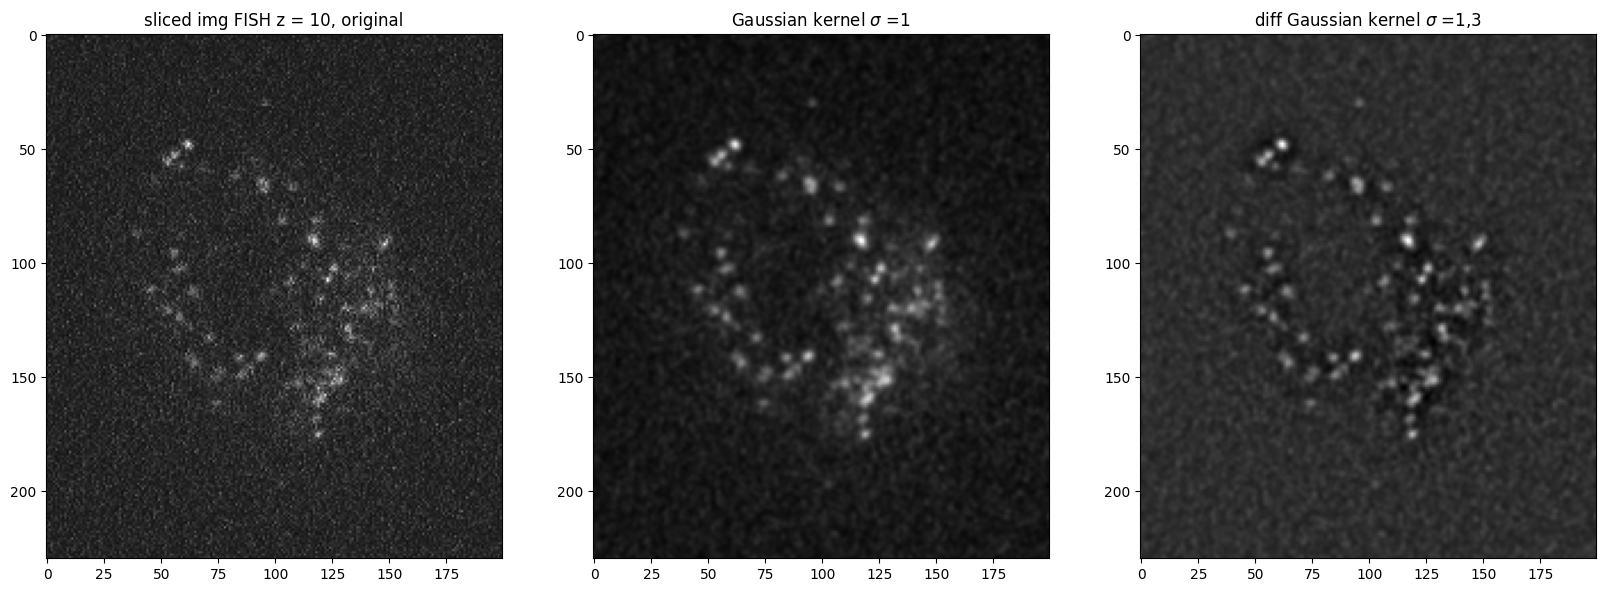

In [ ]:
# The code below should plot your results for Task 5 once the variables are defined correctly
if img_diff_gaussians is not None:
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    ax[0].imshow(img_FISH_slice,cmap='gray')
    ax[0].set(title='sliced img FISH z = 10, original')
    ax[1].imshow(img_gaussian_filter_sigma_1,cmap='gray')
    ax[1].set(title='Gaussian kernel $\sigma$ =1')
    ax[2].imshow(img_diff_gaussians,cmap='gray')
    ax[2].set(title='diff Gaussian kernel $\sigma$ =1,3')
    plt.show()